In [1]:
import pandas as pd
df = pd.read_csv('../datafiles/Boston.csv') # csvの読み込み
df.head(2) # 先頭2行の表示

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,27.71,13.2


In [2]:
df.shape

(100, 13)

In [3]:
df2 = df.fillna(df.mean(numeric_only=True)) # 列ごとの平均値で欠損値の穴埋め

In [4]:
dummy = pd.get_dummies(df2['CRIME'], 
                       drop_first = True, dtype=int)
df3 = df2.join(dummy) # df2とdummyを列方向に結合
df3 = df3.drop(['CRIME'], axis = 1) # 元のCRIMEを削除

df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,27.71,13.2,1,0


In [5]:
from sklearn.preprocessing import StandardScaler
 # 中身が整数だと、fit_transformで警告になるので、
# float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

In [6]:
from sklearn.decomposition import PCA

In [7]:
model = PCA(n_components = 2, whiten = True) # モデル作成

In [8]:
# モデルに学習させる
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [9]:
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0] )
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

[ 0.23265443 -0.36616284 -0.04517974 -0.35503904  0.20084616 -0.30527702
  0.30707163 -0.30948249 -0.33128121 -0.16496587 -0.27862981  0.20302074
 -0.04112365  0.32030142]
-----
[-0.14681922  0.02281697  0.19632056  0.13501227  0.41326429  0.194608
 -0.28852895 -0.10302306 -0.11673939 -0.34444414 -0.18315489  0.44817178
  0.42053215 -0.27406254]


In [10]:
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head(3)

,0,1
0,-1.517109,-0.708638
1,-0.548444,-0.185088
2,1.426543,-0.586736


In [11]:
new_df.columns = ['PC1', 'PC2']
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([df5, new_df], axis=1)

In [12]:
df_corr = df6.corr() # 相関係数の計算
df_corr.loc[:'very_low', 'PC1':]

,PC1,PC2
ZN,0.569300,-0.216191
INDUS,-0.895993,0.033598
CHAS,-0.110554,0.289082
NOX,-0.868773,0.198806
RM,0.491466,0.608532
AGE,-0.747006,0.286560
DIS,0.751398,-0.424859
RAD,-0.757297,-0.151701
TAX,-0.810638,-0.171899
PTRATIO,-0.403668,-0.507194


In [13]:
# わかりやすいように変数に代入
pc_corr = df_corr.loc[:'very_low', 'PC1':]

pc_corr['PC1'].sort_values(ascending = False)

very_low    0.783771
DIS         0.751398
ZN          0.569300
PRICE       0.496787
RM          0.491466
low        -0.100629
CHAS       -0.110554
PTRATIO    -0.403668
LSTAT      -0.681801
AGE        -0.747006
RAD        -0.757297
TAX        -0.810638
NOX        -0.868773
INDUS      -0.895993
Name: PC1, dtype: float64

In [18]:
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.659933
low         0.619234
RM          0.608532
CHAS        0.289082
AGE         0.286560
NOX         0.198806
INDUS       0.033598
RAD        -0.151701
TAX        -0.171899
ZN         -0.216191
LSTAT      -0.269696
very_low   -0.403557
DIS        -0.424859
PTRATIO    -0.507194
Name: PC2, dtype: float64

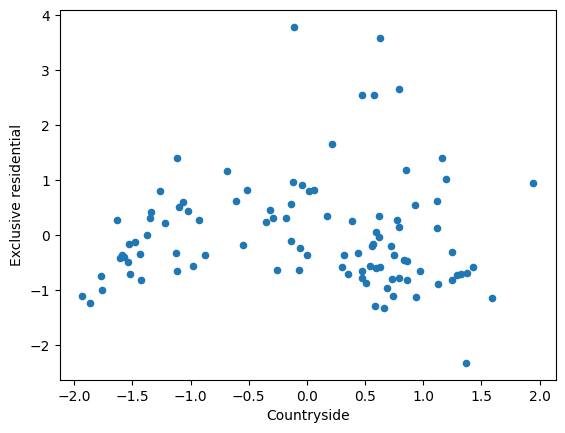

In [14]:
import matplotlib.pyplot as plt
#都市の発展度合いと住環境の良さ
col = ['Countryside', 'Exclusive residential']

new_df.columns = col # 列名の変更

new_df.plot(kind = 'scatter', x = 'Countryside',
    y = 'Exclusive residential') # 散布図
plt.savefig("14-14.png")

In [15]:
model = PCA(whiten = True)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 14)

In [16]:
model.explained_variance_ratio_[0:4] # 寄与率

array([0.42769329, 0.15487544, 0.10865349, 0.06821818])

<Axes: >

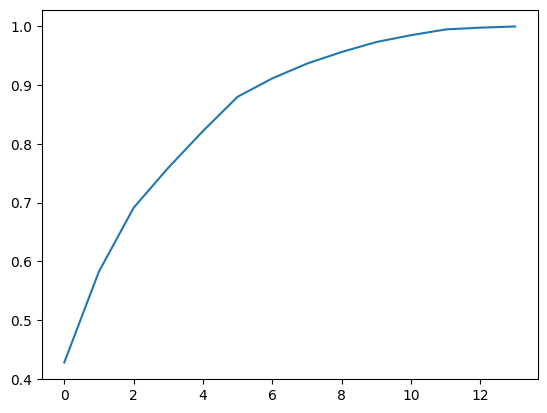

In [17]:
ratio = model.explained_variance_ratio_ # 寄与率のデータ集合

array = [] # 第N列までの累積寄与率を格納するリスト
for i in range(len(ratio)):
# 累積寄与率の計算
    ruiseki = sum(ratio[0:(i+1)])

    array.append(ruiseki) # 累積寄与率の格納

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind = 'line')

In [18]:
thred = 0.8 # 累積寄与率のしきい値
for i in range(len(array)):
 # 第(i + 1)列の累積寄与率がthredより大きいかチェック
    if array[i] >= thred:
        print(i + 1)
        break

5


In [19]:
# もとデータの全情報の80%を賄うために、新規の列を5つに設定
model = PCA(n_components=5, whiten = True)

model.fit (sc_df) # 学習

# 元データを新規の列（5列）に当てはめる
new = model.transform(sc_df)

In [20]:
# 主成分分析の結果をデータフレームに変換
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
new_df2 = pd.DataFrame(new, columns = col)

# データフレームをcsvファイルとして保存
new_df2.to_csv('boston_pca.csv', index = False)

In [23]:
df = pd.read_csv('../datafiles/cinema.csv')
df = df.drop('cinema_id', axis = 1)
# 欠損値補完
df = df.fillna(df.mean())
# 可能なら外れ値の確認もするが
# 今回は割愛

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns = df.columns)

In [25]:
# 累積寄与率を調べる
from sklearn.decomposition import PCA
model = PCA(whiten = True)
model.fit(sc_df)

total = []
for i in model.explained_variance_ratio_:
    if len(total) == 0:
        total.append(i)
    else:
        tmp = total[-1] + i
        total.append(tmp)
total

[0.5401206784462207,
 0.7261760786703706,
 0.862487433716525,
 0.9677581622696744,
 1.0]

In [26]:
model = PCA(whiten=True, n_components = 3)
model.fit(sc_df)
new = pd.DataFrame(model.transform(sc_df), columns=['pc1',
'pc2', 'pc3'])
new_df = pd.concat([new, sc_df], axis = 1)
cor_df = new_df.corr()
cor_df.loc['pc1':'pc3', 'SNS1':]

,SNS1,SNS2,actor,original,sales
pc1,0.736368,0.598555,0.837999,0.469117,0.936901
pc2,-0.050756,-0.534089,-0.037073,0.800559,0.013415
pc3,-0.531509,0.536704,-0.017275,0.324773,-0.072303
